### Modeling COCO - QA
* [Review](https://arxiv.org/abs/1610.01465)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/coco-qa/'
COLUMN = 'embeddings'

In [3]:
text_path, images_path = os.listdir(PATH)

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,questions,image_id,answers,types,split,embeddings
0,what is using umbrellas as a central theme,397899,sculpture,0,train,"[3.8792498111724854, -0.3373020589351654, 2.72..."
1,what walks toward the rope perimeter fence,310683,elephant,0,train,"[1.2933942079544067, -1.494146466255188, 0.500..."
2,what is the color of the horses,23004,brown,2,train,"[2.9307196140289307, -2.889282464981079, -0.60..."
3,where is the black cat laying down,117931,sink,3,train,"[1.9963053464889526, -0.6492555737495422, 1.77..."
4,what is the color of the character,220218,purple,2,train,"[-0.5075816512107849, -1.5164475440979004, 0.1..."
...,...,...,...,...,...,...
117679,what are there grouped together here,406426,vegetables,0,test,"[3.4933199882507324, -2.6558287143707275, 1.05..."
117680,what serves as the train trestle,545581,bridge,0,test,"[2.689941167831421, -2.478192090988159, 0.2251..."
117681,what is the color of the plate,40404,white,2,test,"[0.622462809085846, -2.8684604167938232, -0.40..."
117682,what is sleeping on the blue couch,570521,cat,0,test,"[3.501220941543579, -1.2031269073486328, 3.914..."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,000000492164.jpg,-4.120322,-0.861838,-1.574686,-0.377600,-1.143290,-0.820529,-1.464788,-0.585527,1.565520,...,2.156492,0.733686,-1.684320,1.899588,1.202093,1.046192,3.336528,1.648984,3.385030,-1.749917
1,000000494240.jpg,1.262150,-2.545208,-2.214187,-0.438926,-1.460701,-2.933234,0.679571,-1.260704,1.990085,...,-1.215957,0.795889,-3.177773,1.399150,-0.923868,-1.138168,-2.748717,-0.460910,-4.501886,-1.589762
2,000000546298.jpg,1.854058,-2.434641,-4.676404,-5.156973,1.956929,-1.904949,-1.089629,2.075478,1.904752,...,-0.909014,0.605903,2.549776,0.116877,1.654576,0.535118,0.283361,-0.588969,1.246408,1.329121
3,000000001072.jpg,3.776999,-0.392807,-0.368420,-0.723537,-4.110651,-1.411750,3.034316,-1.959409,-0.382609,...,-0.334199,3.178964,-1.243339,0.818931,-0.288869,-0.211096,2.510984,-1.331091,0.323675,-0.178847
4,000000147839.jpg,-2.418237,-0.741610,-0.355587,0.453301,-1.957395,0.979703,-0.256348,-1.298923,0.808389,...,-0.255671,2.633270,-1.671388,0.967470,-3.105538,0.939509,-2.398648,-0.562799,-2.257563,-2.392581


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image_id", "ImageName")
df.head()

,questions,answers,types,split,text_1,text_2,text_3,text_4,text_5,text_6,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,what is using umbrellas as a central theme,sculpture,0,train,3.879250,-0.337302,2.728295,-0.177727,-0.734334,-0.124322,...,-0.291306,-0.26227,-0.227479,-1.403986,0.079803,0.14777,-1.023563,0.193850,0.246949,-2.262336
1,what does the piece of modern art comprise,umbrellas,0,train,3.165886,-1.776468,0.702027,1.142665,-1.085440,0.059205,...,-0.291306,-0.26227,-0.227479,-1.403986,0.079803,0.14777,-1.023563,0.193850,0.246949,-2.262336
2,what is this sculpture using as a central theme,umbrellas,0,train,2.890666,-1.778237,3.530624,-0.772094,-0.794132,-0.311388,...,-0.291306,-0.26227,-0.227479,-1.403986,0.079803,0.14777,-1.023563,0.193850,0.246949,-2.262336
3,what is the color of the umbrellas,white,2,train,1.495979,-2.096776,-0.237311,0.309544,-0.410521,-1.360798,...,-0.291306,-0.26227,-0.227479,-1.403986,0.079803,0.14777,-1.023563,0.193850,0.246949,-2.262336
4,what walks toward the rope perimeter fence,elephant,0,train,1.293394,-1.494146,0.500123,-0.098010,-0.942691,-2.122753,...,-3.133440,1.22679,-4.741875,1.580570,0.571090,-0.75397,-0.807536,0.534862,-1.499307,1.479312


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'answers'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Train Shape: (78736, 4868)
Test Shape: (38948, 4868)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Epoch 1/8 - Test Accuracy: 0.3686
Epoch 2/8 - Test Accuracy: 0.4252
Epoch 3/8 - Test Accuracy: 0.4459
Epoch 4/8 - Test Accuracy: 0.4431
Epoch 5/8 - Test Accuracy: 0.4579
Epoch 6/8 - Test Accuracy: 0.4624
Epoch 7/8 - Test Accuracy: 0.4602
Epoch 8/8 - Test Accuracy: 0.4679


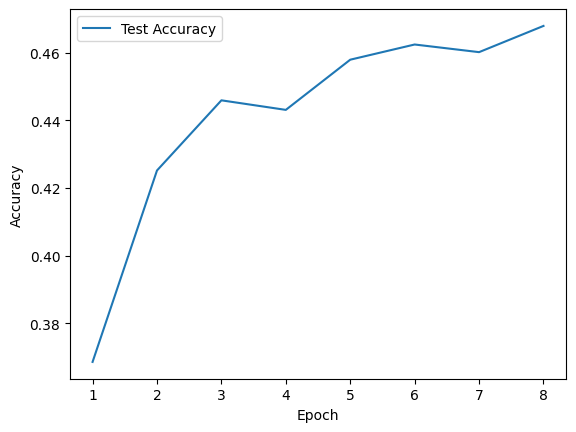

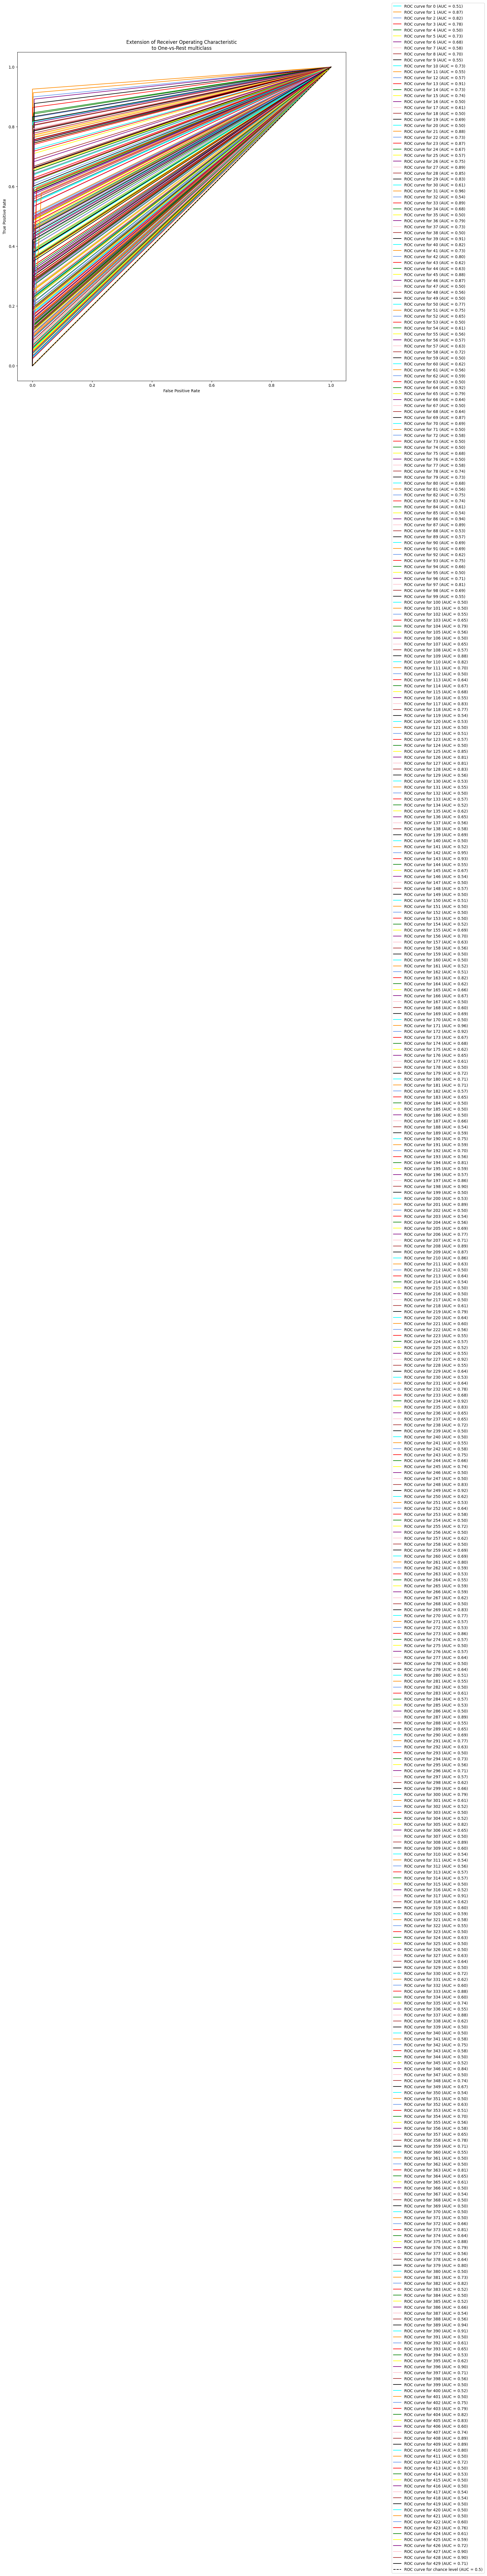

              precision    recall  f1-score   support

           0       0.09      0.02      0.04        41
           1       0.65      0.74      0.69       439
           2       0.76      0.65      0.70       163
           3       0.40      0.56      0.47        32
           4       0.00      0.00      0.00        15
           5       0.33      0.47      0.39        34
           6       0.52      0.35      0.42        31
           7       0.11      0.17      0.13        12
           8       0.24      0.40      0.30        10
           9       0.07      0.10      0.08        21
          10       0.11      0.45      0.18        11
          11       0.11      0.10      0.10        52
          12       0.20      0.14      0.16        29
          13       0.77      0.82      0.79       309
          14       0.57      0.47      0.51       116
          15       0.70      0.47      0.56        97
          16       0.00      0.00      0.00         7
          17       0.27    

/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/datascience/conda/retina_embeddings_v0_0_1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=10, multilabel=multilabel, report=True)

In [ ]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=10, multilabel=multilabel, report=True)

Training Late Fusion Model:
Epoch 1/8 - Test Accuracy: 0.3751
Epoch 2/8 - Test Accuracy: 0.4351
